In [1]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tweets-dataset.csv')

# Question 1

In [3]:
tokens = []
fl = 0
t = TweetTokenizer()
for se in data.Sentence:
    to = t.tokenize(se)
    for x in to:
        for y in x:
            if y.isalpha():
                fl = 1
                break
        if fl:
            tokens.append(x.lower())
            fl = 0

In [4]:
token_freq = {}
for s in tokens:
    try:
        token_freq[s] +=1
    except:
        token_freq[s] = 1
        

In [5]:
types=[]
lengths = np.zeros(len(token_freq))
freq=np.zeros(len(token_freq))
count = 0
for key,val in token_freq.items():
    types.append(key)
    freq[count] = val
    lengths[count] = len(key)
    count+=1

In [6]:
no_of_tokens = len(tokens)
no_of_types = len(types)
ttr = no_of_types/no_of_tokens

In [7]:
print("Number of Tokens: ", no_of_tokens)
print("Number of Types: ", no_of_types)
print("TTR: ",ttr)

Number of Tokens:  312290
Number of Types:  41296
TTR:  0.1322360626340901


# Question 2

In [9]:
freq_sort_ind = np.argsort(freq)

In [10]:
# for i in range(1,len(types)+1):
#     print(types[freq_sort_ind[-i]], freq[freq_sort_ind[-i]])

In [11]:
words = ['sab','bas','time','day','like','just','love','kaise','happy','kahan']
m = [17,16,15,10,11,12,10,5,4,4]#number of meanings of the words

In [12]:
root_freq = []
root_rank = []
for w in words:
    root_freq.append(np.sqrt(freq[types.index(w)]))
    root_rank.append(1/(np.sqrt(types.index(w)+1)))

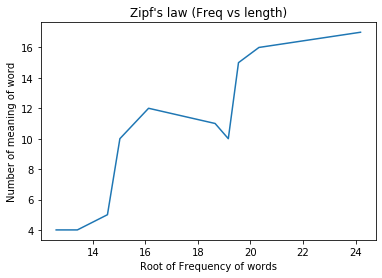

In [13]:
plt.plot(root_freq,m)
# plt.plot(m,root_rank)
plt.xlabel('Root of Frequency of words')
plt.ylabel('Number of meaning of word')
plt.title('Zipf\'s law (Freq vs length)')
plt.show()

It can be observed that zipf's law is not strictly obeyed.

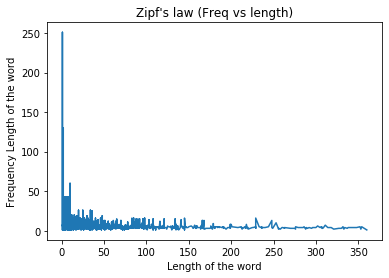

In [14]:
# plt.plot(range(len(freq_sort_ind[::-1])),freq[freq_sort_ind[::-1]][:]*lengths[freq_sort_ind[::-1]][:])
plt.plot(freq[freq_sort_ind[::-1]][100:],lengths[freq_sort_ind[::-1]][100:])
plt.ylabel('Frequency Length of the word')
plt.xlabel('Length of the word')
plt.title('Zipf\'s law (Freq vs length)')
plt.show()

We can observe that freq vs length graph is approximately hyperbolic which implies that f is inversely proportional to l. Below we can that the freq\*length is approximately constant.

In [15]:
print("Freq*length values for 10 words:")
print(freq[freq_sort_ind[::-1]][4050:4100]*lengths[freq_sort_ind[::-1]][4050:4100])

Freq*length values for 10 words:
[16. 48. 56. 40. 32. 24. 48. 40. 80. 24. 40. 64. 24. 40. 16. 56. 56. 32.
 64. 48. 56. 72. 32. 48. 48. 40. 64. 48. 56. 40. 40. 40. 24. 48. 64. 32.
 40. 80. 32. 64. 64. 24. 48. 40. 56. 24. 16. 40. 40. 40.]


# Question 3

In [16]:
n=[]
v=[]
for i in range(1,no_of_tokens,100):
    n.append(len(tokens[0:i]))
    v.append(len(set(tokens[0:i])))

In [18]:
p = np.polyfit(np.log10(n),np.log10(v),1)

In [19]:
k = 10**(p[1])
beta = p[0]
v_new = k*(n**beta)

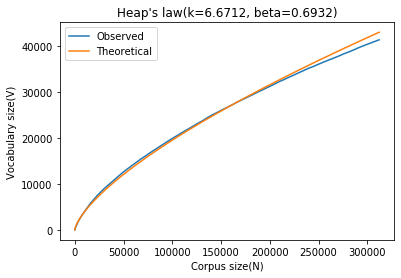

In [20]:
plt.plot(n,v)
plt.plot(n,v_new)
plt.legend(['Observed', 'Theoretical'])
plt.title('Heap\'s law(k='+str(format(k,'.4f'))+', beta='+str(format(beta,'.4f'))+')')
plt.xlabel('Corpus size(N)')
plt.ylabel('Vocabulary size(V)')
plt.show()

# References
https://www.nltk.org/api/nltk.tokenize.html

https://stackoverflow.com/questions/48630248/word-tokenize-twitter-data
